In [67]:
## Lets read some drone data

In [1]:
## First import general packages for running python analysis:
import os, h5py, datetime,pytz,pickle, yaml
import numpy as np
from matplotlib.pyplot import *
from matplotlib import pyplot as plt

## Then import the beamcals module packages and initialize 'gbosite' class:
from beamcals import corr, concat, drone, bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
import beamcals.reduce_ccclass as rc
gbosite=site.site('../beamcals/beamcals/sites/GBO_config.npz')

In [2]:
fly = '618'

In [3]:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])


Initializing drone data via datcon_csv routine: FLY618.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 0/16406 non-nan values
    --> RTK Data not usable for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-21 18:25:07.095000+00:00 2021-10-21 18:52:32.541000+00:00


In [4]:
pu.Plot_Drone_Coordinates(dronetest0825,coo='xy')#,t_bounds=[tlb,tub])
#pu.Plot_Drone_Coordinates(dronetest0825,coo='xy',t_bounds=[2400,10200])

NameError: name 'dronetest0825' is not defined

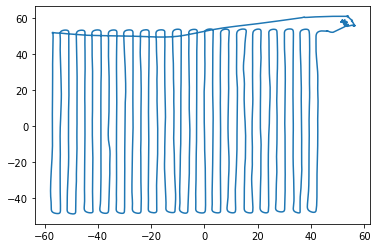

In [5]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m

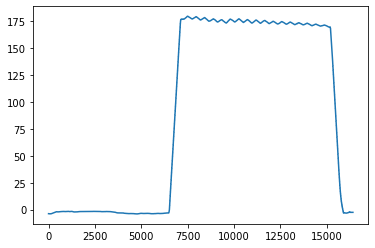

In [6]:
plt.plot(dronedat.coords_xyz_LC[:,2]) # height

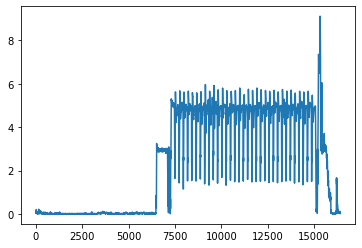

In [7]:
plt.plot(dronedat.velocity) # velocity

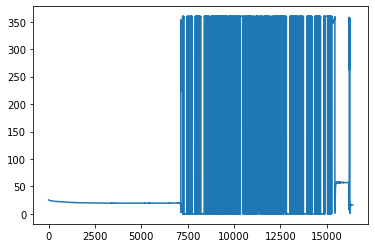

In [8]:
plt.plot(dronedat.yaw) # yaw angle



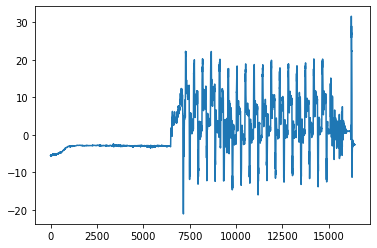

In [9]:
plt.plot(dronedat.pitch) # pitch angle

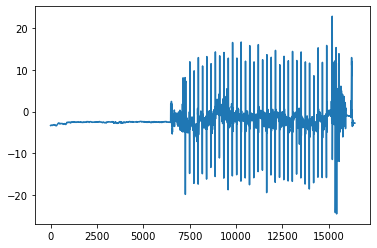

In [10]:
plt.plot(dronedat.roll) # roll angle

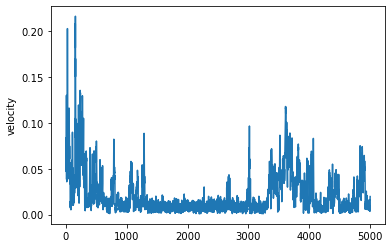

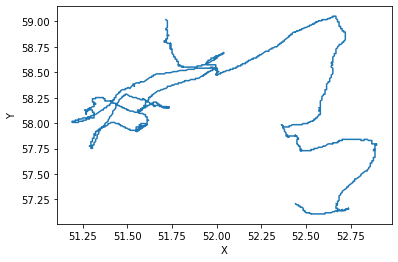

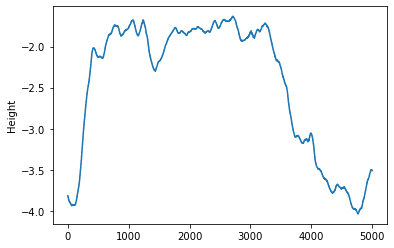

In [46]:
# Try to find start of flight
tlbs = 0
tubs = 5000

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

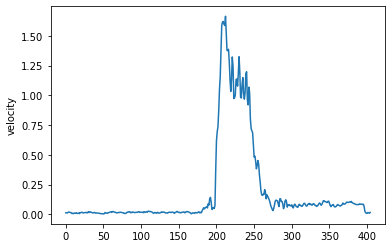

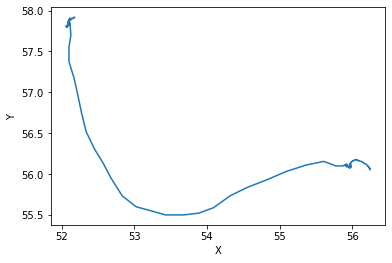

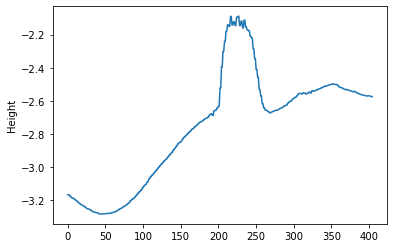

In [47]:
# Try to find end of flight -- this is probably them moving the drone to the right location
tlb = 16000
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

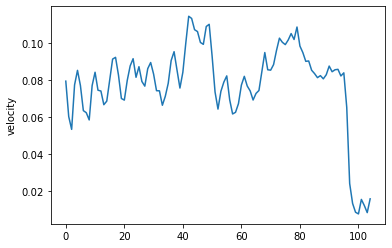

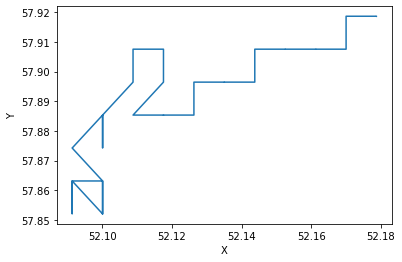

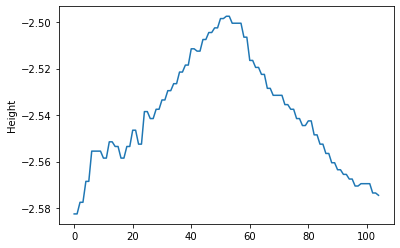

In [48]:
# Try to find end of flight -- this is probably them moving the drone to the right location
tlb = 16300
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

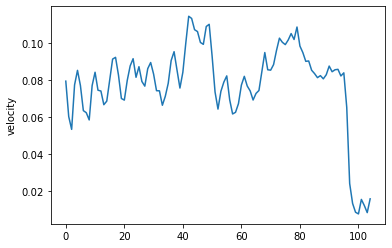

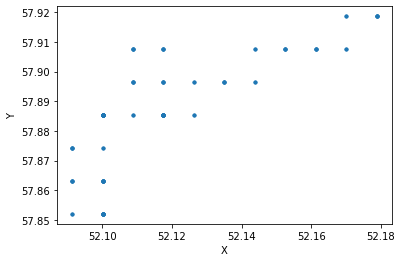

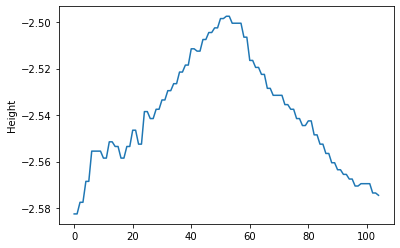

In [49]:
# Those X, Y stationary points --- are they repated values? That would skew the stddev calculation
tlb = 16300
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1],marker='.',linestyle='None') #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [51]:
## 

Xs618=(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]))#Mean start X location
Ys618=(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) #Mean start Y location
Xe618=(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean end X location
Ye618=(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean end Y location
print(Xs618,Ys618,Xe618,Ye618)
sd_Xs618 = np.std(dronedat.coords_xyz_LC[tlbs:tubs,0])
sd_Ys618 = np.std(dronedat.coords_xyz_LC[tlbs:tubs,1])
sd_Xe618 = np.std(dronedat.coords_xyz_LC[tlb:tub,0])
sd_Ye618 = np.std(dronedat.coords_xyz_LC[tlb:tub,1])


print(sd_Xs618,
sd_Ys618,
sd_Xe618,
sd_Ye618)

51.92861408743503 58.151572679772556 52.118174246044056 57.88648881392803
0.5273608419771476 0.4284967797325624 0.02488361492702793 0.019376566452833782


In [20]:
difX=(Xs618- Xe618)
difY=(Ys618 - Ye618)
print(std_dev)
print(difX,difY)
print((Xs618+Xe618)/2)
print((Ys618+Ye618)/2)

0.5273608419771476
-0.18956015860902653 0.2650838658445238
52.02339416673954
58.01903074685029


In [11]:
fly = '625'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY625.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 0/14495 non-nan values
    --> RTK Data not usable for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-21 21:39:52.600000+00:00 2021-10-21 22:04:05.590000+00:00


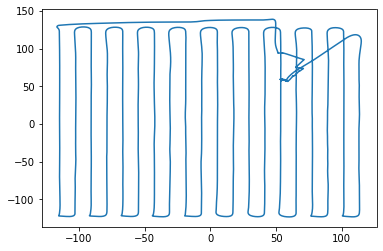

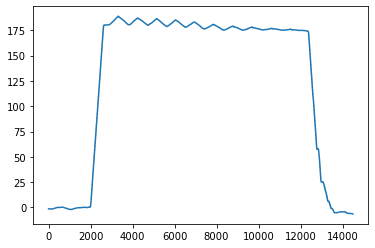

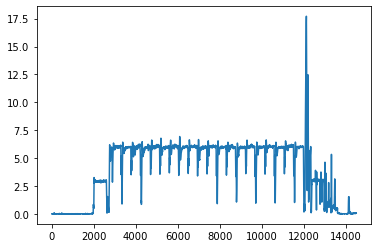

In [12]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()


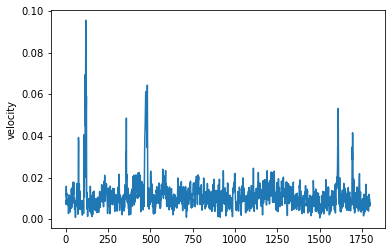

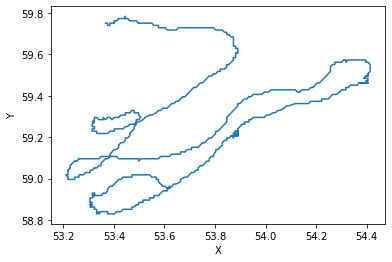

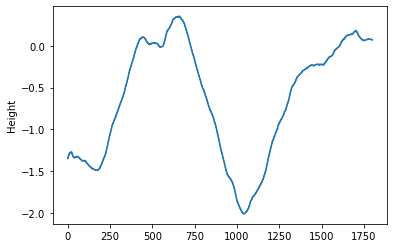

In [15]:
# Try to find start of flight
tlbs = 0
tubs = 1800

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

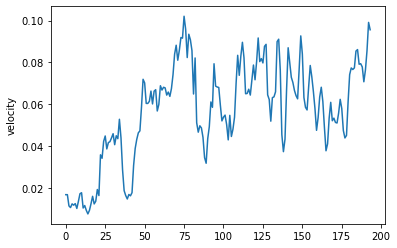

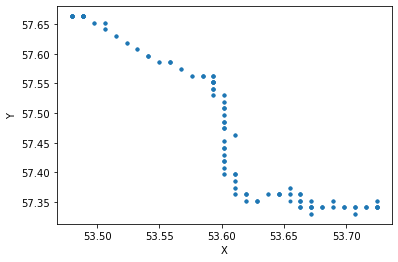

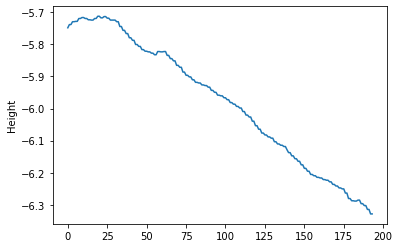

In [16]:
# Those X, Y stationary points --- are they repated values? That would skew the stddev calculation
tlb = 14300
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1],marker='.',linestyle='None') #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [17]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location

avgX625=((np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]) + np.mean(dronedat.coords_xyz_LC[tlb:tub,0]))/2)
avgY625=((np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1]) + np.mean(dronedat.coords_xyz_LC[tlb:tub,1]))/2)
print(avgX625,avgY625)
print(avgX618,avgY618)
print(avgX618-avgX625)
print(avgY618-avgY625)

53.69067920054249
59.28688495746872
53.60759563208321
57.46709581158851
53.649137416312854 58.37699038452861


NameError: name 'avgX618' is not defined

In [52]:
fly = '536'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY536.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 12842/12842 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-08-26 19:50:28.699000+00:00 2021-08-26 20:11:57.064000+00:00


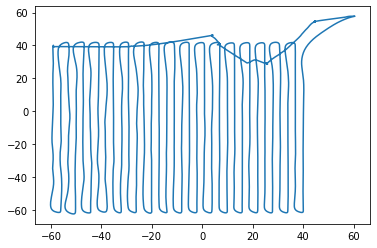

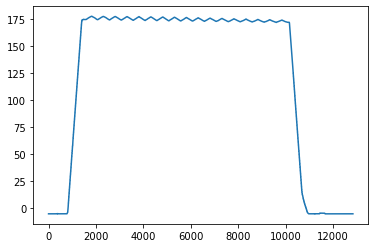

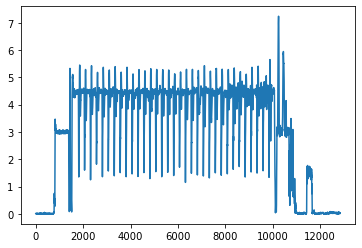

In [53]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

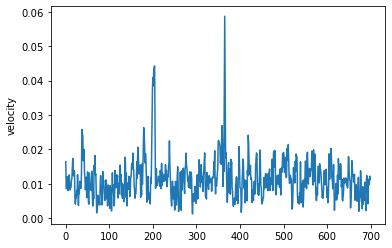

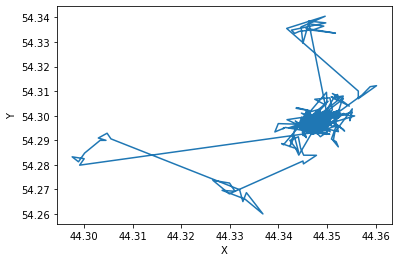

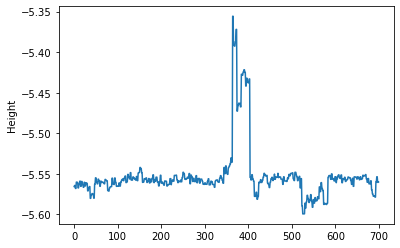

In [54]:
# Try to find start of flight
tlbs = 0
tubs = 700

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()


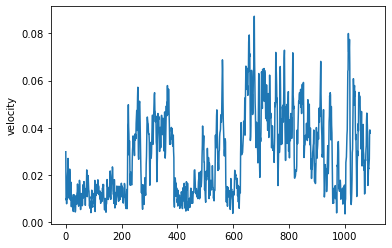

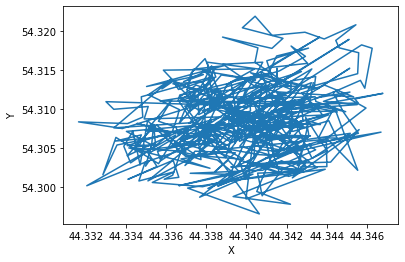

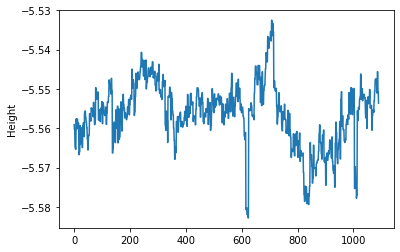

In [55]:
# Try to find end of flight
tlb = 11750
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [59]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location

avgX536=((np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]) + np.mean(dronedat.coords_xyz_LC[tlb:tub,0]))/2)
avgY536=((np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1]) + np.mean(dronedat.coords_xyz_LC[tlb:tub,1]))/2)
print(avgX536,avgY536)

sd_Xs536 = np.std(dronedat.coords_xyz_LC[tlbs:tubs,0])
sd_Ys536 = np.std(dronedat.coords_xyz_LC[tlbs:tubs,1])
sd_Xe536 = np.std(dronedat.coords_xyz_LC[tlb:tub,0])
sd_Ye536 = np.std(dronedat.coords_xyz_LC[tlb:tub,1])


print(sd_Xs536,
sd_Ys536,
sd_Xe536,
sd_Ye536)

44.34608796243697
54.297707609663995
44.339736885313314
54.30846506923069
44.34291242387514 54.30308633944735
0.008656126358566125 0.01047677328562106 0.002921812374363323 0.004380267213540279


In [18]:
fly = '646'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY646.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK Data not found for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-22 18:28:21.800000+00:00 2021-10-22 18:57:22.990000+00:00


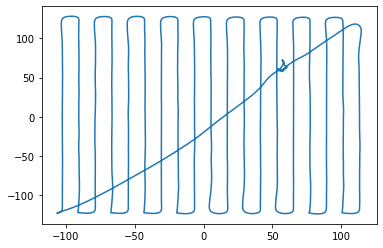

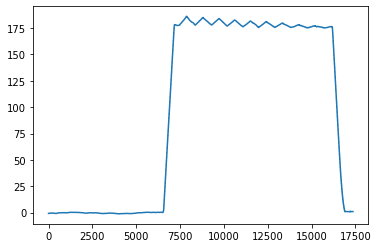

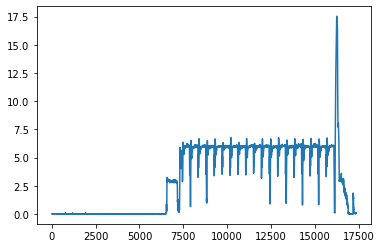

In [19]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

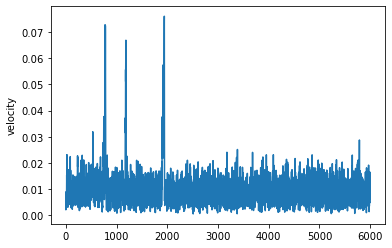

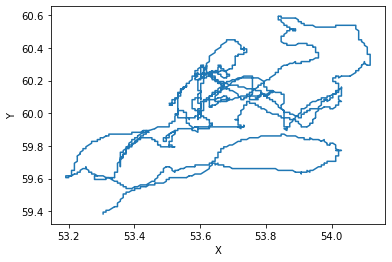

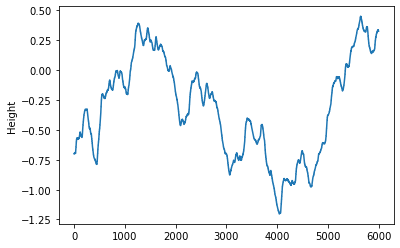

In [20]:
# Try to find start of flight
tlbs = 0
tubs = 6000

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

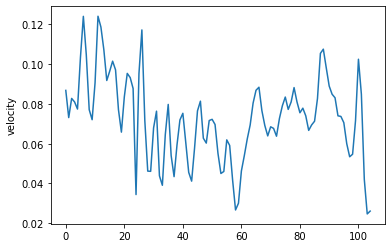

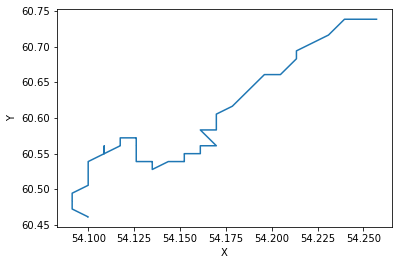

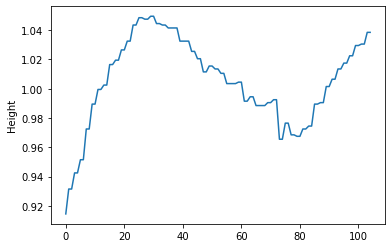

In [23]:
# Try to find end of flight
tlb = 17250

tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [24]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


53.68181689118252
60.03950865964293
54.14719933055851
60.57456346885665


In [25]:
fly = '619'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY619.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK Data not found for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-21 18:58:07.499000+00:00 2021-10-21 19:28:46.223000+00:00


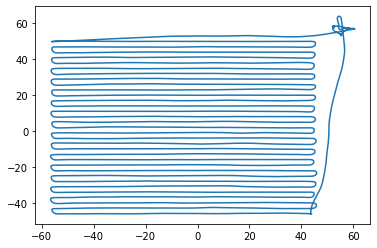

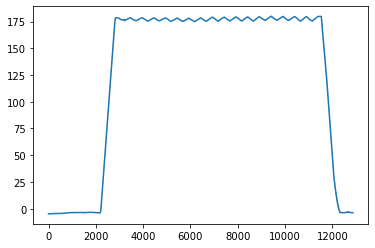

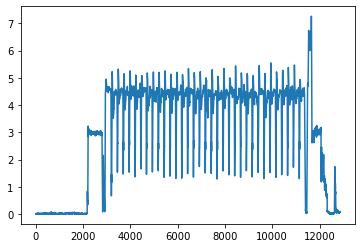

In [26]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

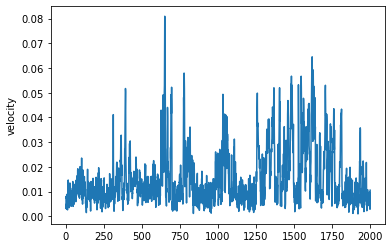

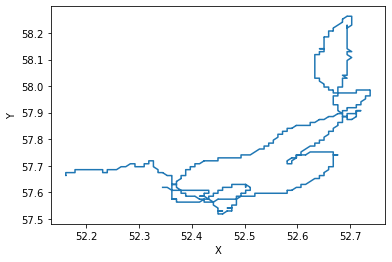

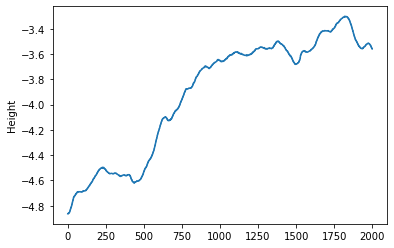

In [27]:
# Try to find start of flight
tlbs = 0
tubs = 2000

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

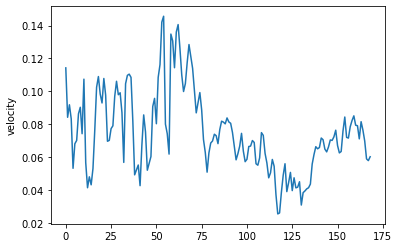

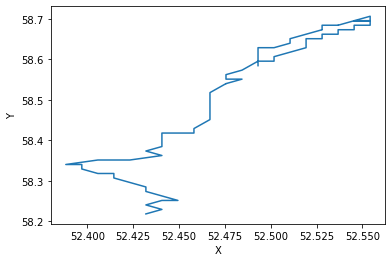

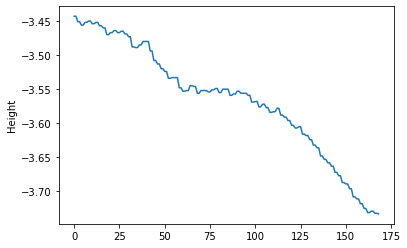

In [30]:
# Try to find end of flight
tlb = 12700
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [31]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


52.53387151744515
57.79371445662179
52.49340149480533
58.547555261376765


In [32]:
fly = '647'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY647.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK Data not found for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-22 18:59:10.399000+00:00 2021-10-22 19:23:33.717000+00:00


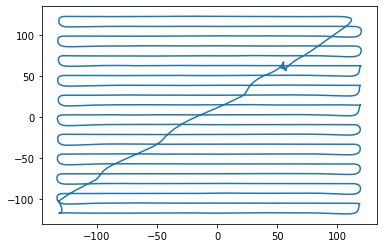

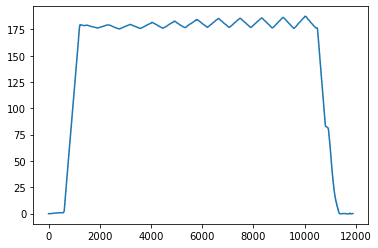

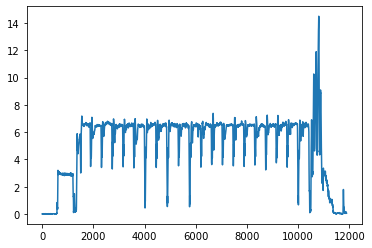

In [36]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

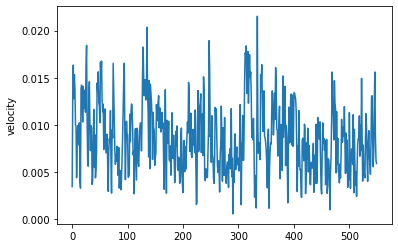

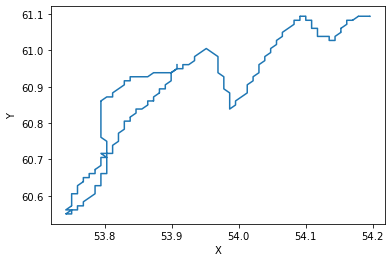

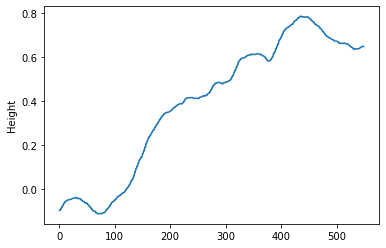

In [37]:
# Try to find start of flight
tlbs = 0
tubs = 550

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

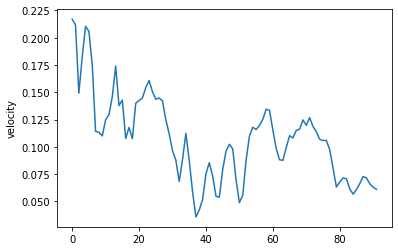

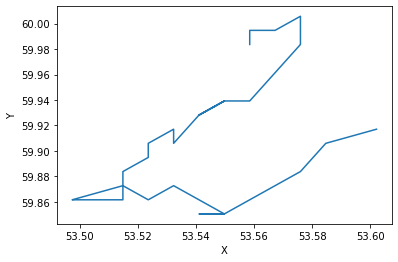

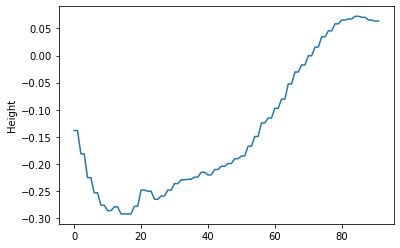

In [38]:
# Try to find end of flight
tlb = 11800
tub = 11900

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [39]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


53.92213515912622
60.8642401538242
53.54579776801243
59.91965508563994


In [40]:
fly = '533'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY533.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 13308/13308 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-08-26 18:30:56.299000+00:00 2021-08-26 18:53:11.824000+00:00


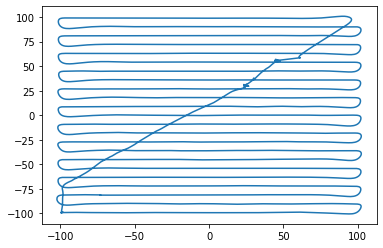

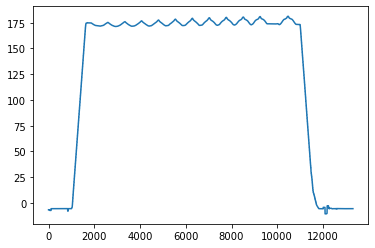

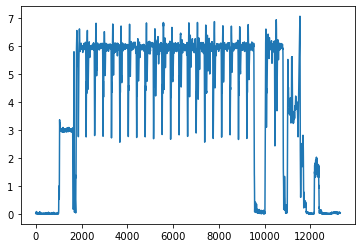

In [41]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

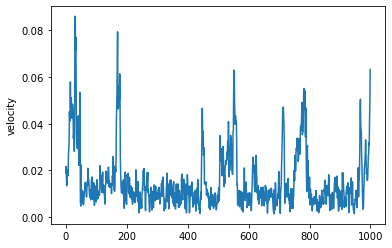

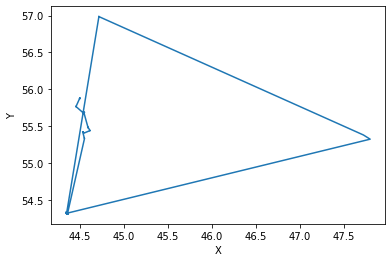

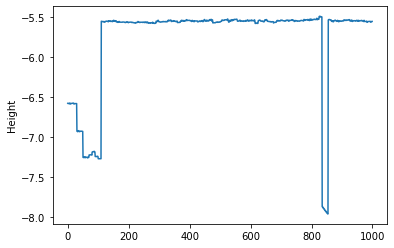

In [45]:
# Try to find start of flight
tlbs = 0
tubs = 1000

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

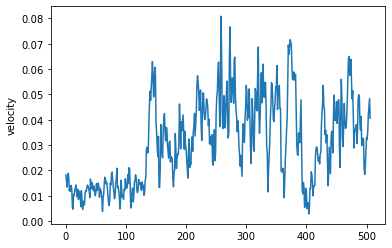

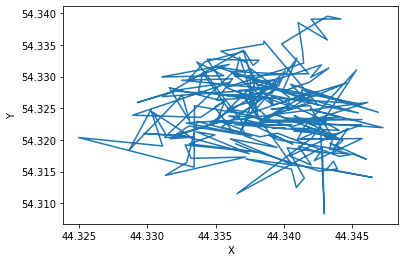

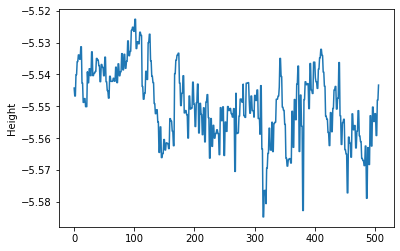

In [49]:
# Try to find end of flight
tlb = 12800
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [50]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


44.45115502257881
54.50526547090562
44.33863260349279
54.32435082253815


In [51]:
fly = '620'

In [52]:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY620.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK Data not found for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-21 19:22:31.900000+00:00 2021-10-21 19:42:41.898000+00:00


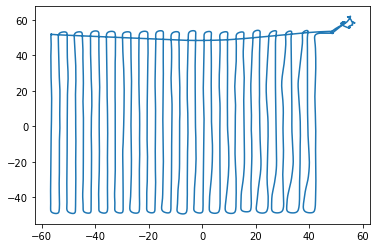

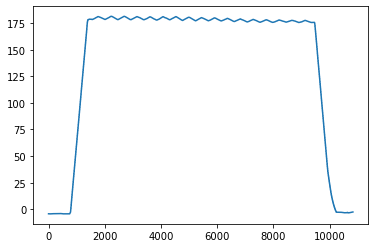

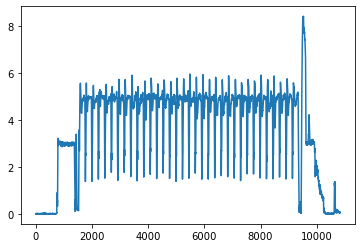

In [53]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

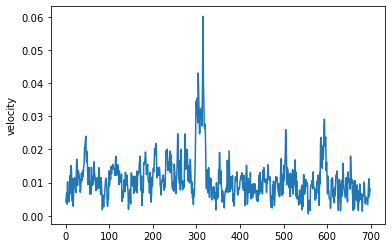

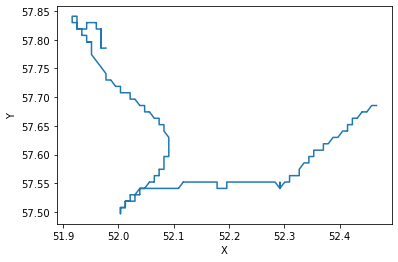

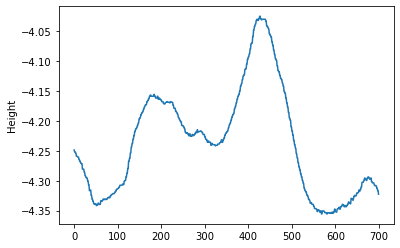

In [56]:
# Try to find start of flight
tlbs = 0
tubs = 700

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

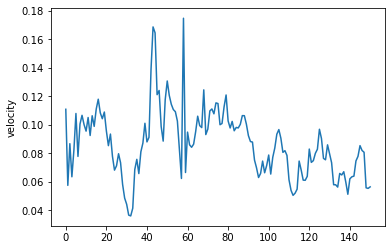

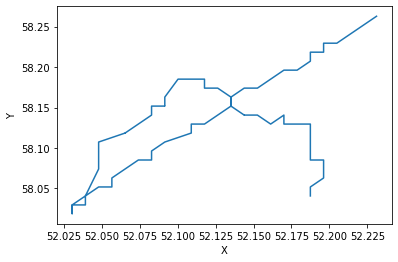

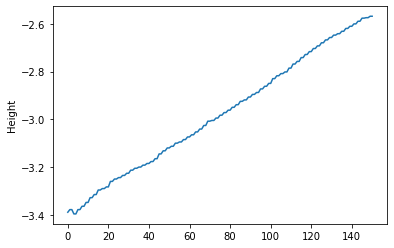

In [60]:
# Try to find end of flight
tlb = 10680
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [61]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location



52.0806522546365
57.65886367354413
52.11966893059337
58.12691614865041


In [62]:
fly = '648'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY648.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK Data not found for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-22 19:22:03.996000+00:00 2021-10-22 19:42:26.404000+00:00


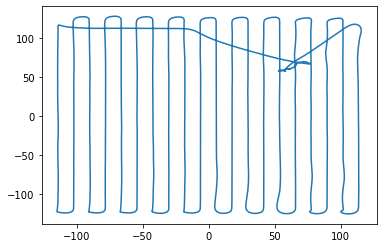

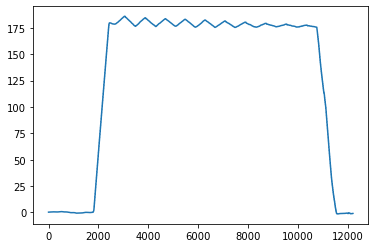

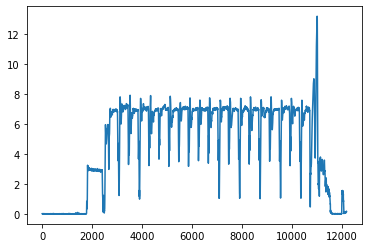

In [63]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

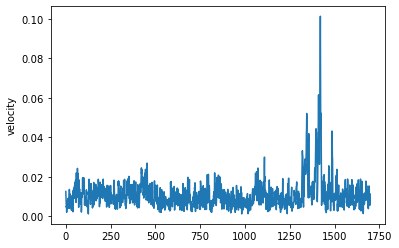

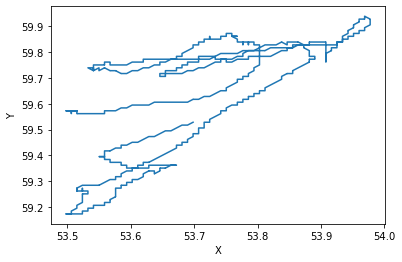

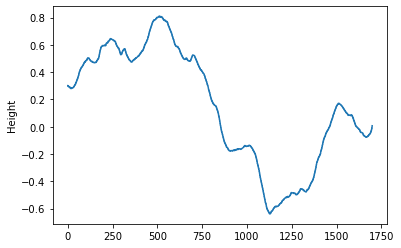

In [66]:
# Try to find start of flight
tlbs = 0
tubs = 1700

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

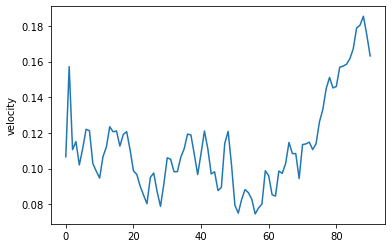

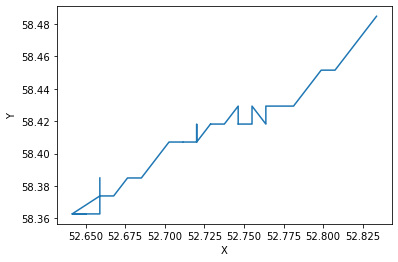

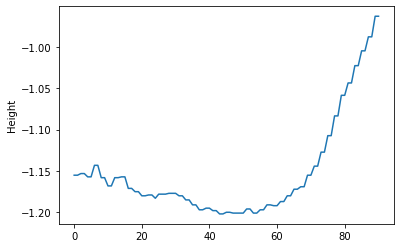

In [70]:
# Try to find end of flight
tlb = 12100
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [71]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


53.70922477486815
59.636590235734644
52.729570655955385
58.41274239513914


In [72]:
fly = '649'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY649.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK Data not found for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-22 19:44:43.900000+00:00 2021-10-22 20:03:56.093000+00:00


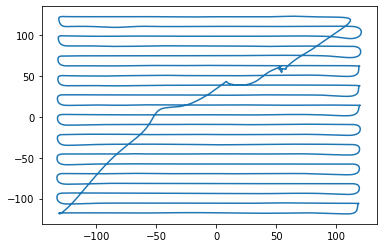

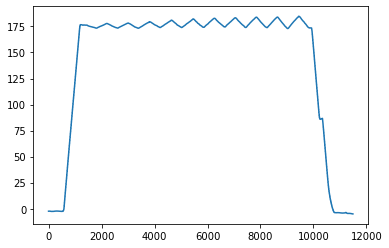

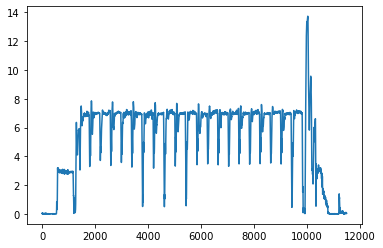

In [73]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

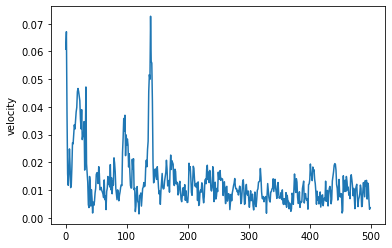

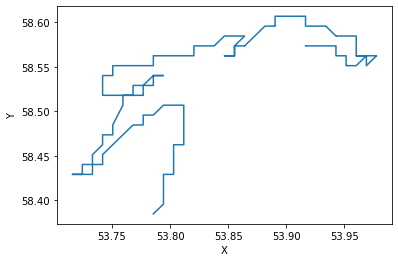

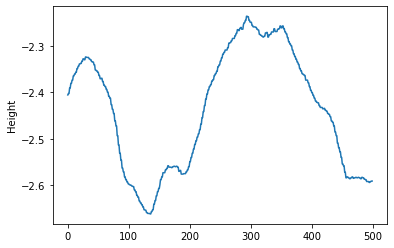

In [75]:
# Try to find start of flight
tlbs = 0
tubs = 500

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

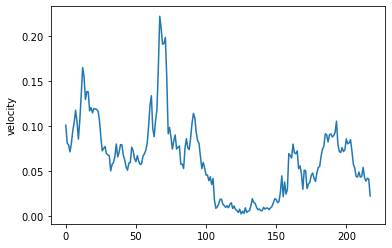

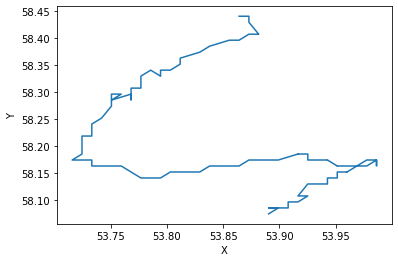

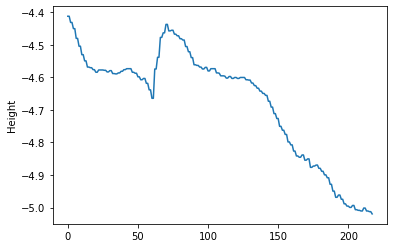

In [80]:
# Try to find end of flight
tlb = 11270
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [81]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


53.83642123090073
58.529113367288176
53.8481564161494
58.22076728446837


In [82]:
fly = '535'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY535.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 12481/12481 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-08-26 19:21:28.799000+00:00 2021-08-26 19:43:58.479000+00:00


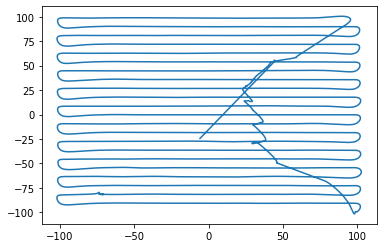

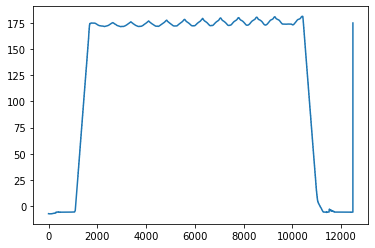

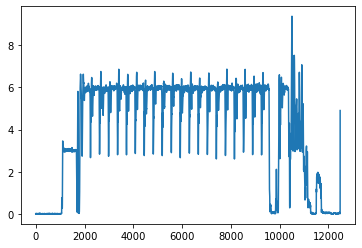

In [83]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()


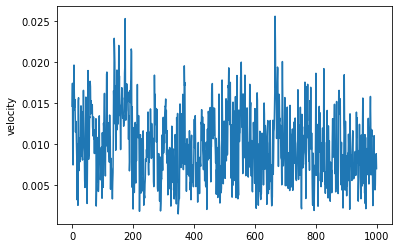

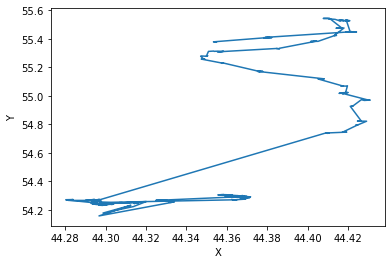

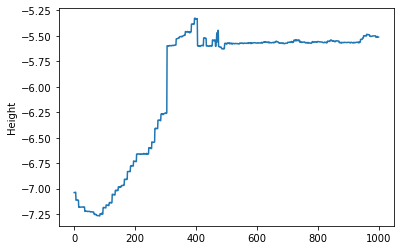

In [86]:
# Try to find start of flight
tlbs = 0
tubs = 1000

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

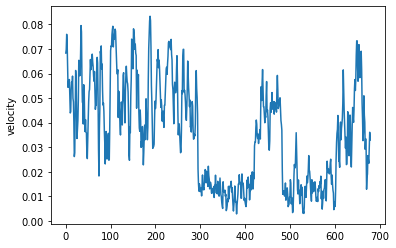

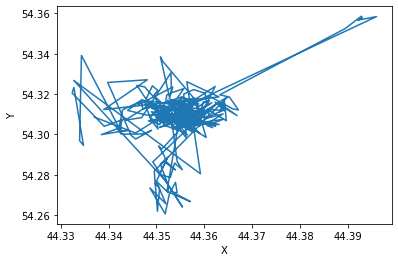

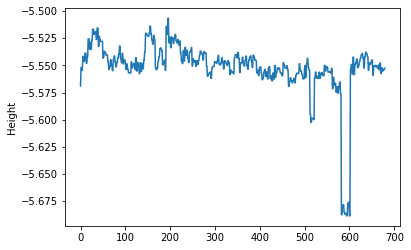

In [88]:
# Try to find end of flight
tlb = 11800
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [89]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0])) # Mean of start X location
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1])) # Mean of start Y location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0])) # Mean of end X location
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1])) # Mean of end Y location


44.36116729889556
54.5652212875175
44.354156000942
54.308302070733816
